Goals: Test Birkhoff Ergodic Theorem

In [2]:
side = 10
particle_radius = 2
scatter_radius_crit = (side - particle_radius)/2**(1/2) - particle_radius
scatter_radius = scatter_radius_crit * 1.1

num_walls = 5
hole = 3
max_steps = 10000000
seed = 49

%run -i pinball_billiard_defs.py

# x = rnd.uniform(-hole_range,hole_range)
# y = -y_range
# speed = 1.0
# theta = rnd.uniform(0,np.pi)
# result = run_trial(x=x, y=y, speed=1.0, theta=theta, max_escapes = 1000)

result = run_trial(max_escapes = 1000)

payoff_rate = np.array([0,0,0,0,1])
wall_ranges = np.array([2*x_range, 2*x_range, 2*y_range, 2*y_range, 2*np.pi*scatter_range])
wall_proportion = wall_ranges / wall_ranges.sum() 
with np.errstate(all='ignore'):
    games = result['escapes']+1
    payoff = result['wall_col'].dot(payoff_rate)
    result['ave_payoff'] = payoff / games
    result['expected_payoff'] = (wall_ranges / (2*hole_range)).dot(payoff_rate)
# result = run_trial(max_escapes = 100)

draw_hist(result)

A Jupyter Widget

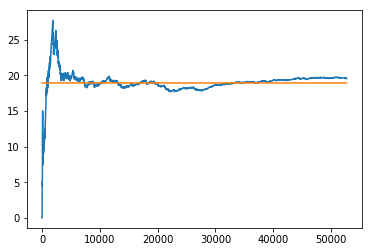

In [3]:
plt.plot(result['ave_payoff'])
plt.plot(result['expected_payoff'] + 0*result['ave_payoff'])
plt.show()